# MAF Results Analysis (Brick 1)
This notebook reads the raw results text and computes:

- `split_call_rate = sd_split_calls / sd_recursions`
- `split_commit_rate = sd_split_committed / sd_split_calls`

Change `INPUT_PATH` below to point to your actual results file.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load results ---
file_path = "fifth.txt"  # adjust if needed
df = pd.read_csv(
    file_path,
    sep=r"\s+",
    header=None,
    engine="python",
    comment="#",
    names=[
        "k",
        "sd_recursions",
        "split_calls",          # how often split was considered
        "split_committed",      # how often split actually changed state
        "decomp_calls",
        "decomp_committed",
        "chen_recursions"
    ]
)

🔹 Average Split Commit Rate: 0.0303 (3.03%)


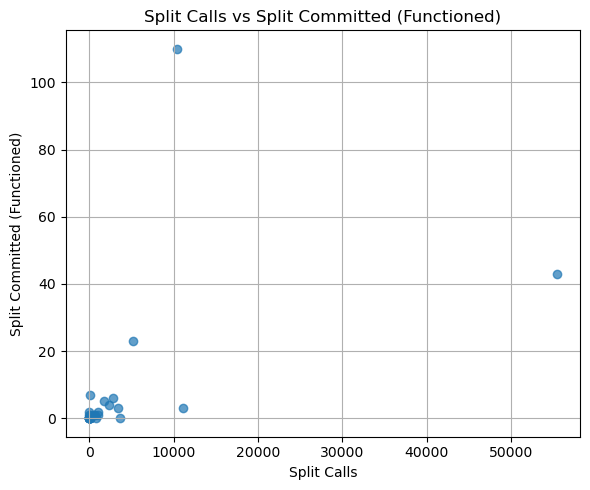

In [22]:

# --- Calculate Split Commit Rate (effectiveness of split) ---
df["split_commit_rate"] = df["split_committed"] / df["split_calls"].replace(0, np.nan)

# --- Summary statistics ---
avg_commit_rate = df["split_commit_rate"].mean(skipna=True)
print(f"🔹 Average Split Commit Rate: {avg_commit_rate:.4f} ({avg_commit_rate * 100:.2f}%)")

# --- Visualize: Scatter of split_calls vs split_committed ---
plt.figure(figsize=(6, 5))
plt.scatter(df["split_calls"], df["split_committed"], alpha=0.7)
plt.xlabel("Split Calls")
plt.ylabel("Split Committed (Functioned)")
plt.title("Split Calls vs Split Committed (Functioned)")
plt.grid(True)
plt.tight_layout()
plt.show()



🔹 Average Split Call Rate: 0.0245 (2.45%)


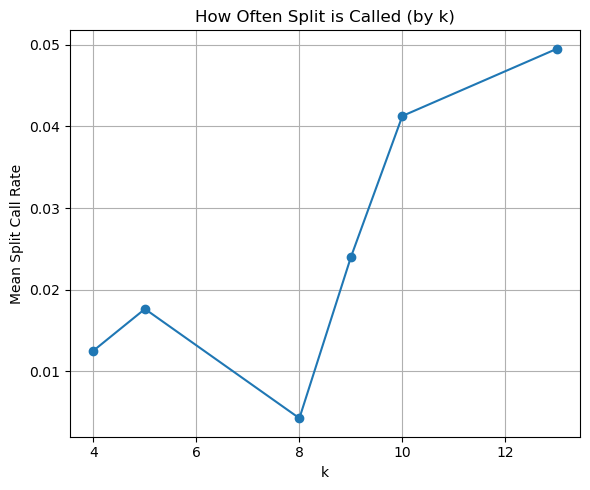

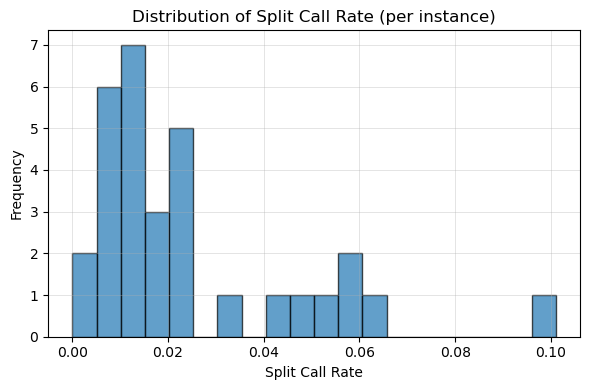

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load results ---
file_path = "fifth.txt"
df = pd.read_csv(
    file_path,
    sep=r"\s+",
    header=None,
    engine="python",
    comment="#",
    names=[
        "k",
        "sd_recursions",       # total recursive calls in split/decompose
        "split_calls",         # how often split was considered
        "split_committed",
        "decomp_calls",
        "decomp_committed",
        "chen_recursions"
    ]
)

# --- Calculate Split Call Rate ---
df["split_call_rate"] = df["split_calls"] / df["sd_recursions"].replace(0, np.nan)

# --- Summary statistics ---
avg_call_rate = df["split_call_rate"].mean(skipna=True)
print(f"🔹 Average Split Call Rate: {avg_call_rate:.4f} ({avg_call_rate * 100:.2f}%)")

# --- Visualize: Split call rate vs k (averaged) ---
grouped = df.groupby("k")["split_call_rate"].mean().reset_index()

plt.figure(figsize=(6, 5))
plt.plot(grouped["k"], grouped["split_call_rate"], marker='o', linestyle='-')
plt.xlabel("k")
plt.ylabel("Mean Split Call Rate")
plt.title("How Often Split is Called (by k)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Optional: Histogram of split call rate per instance ---
plt.figure(figsize=(6, 4))
plt.hist(df["split_call_rate"].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Split Call Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Split Call Rate (per instance)")
plt.grid(True, linewidth=0.4, alpha=0.6)
plt.tight_layout()
plt.show()


🔹 Pearson Correlation between Split Call Rate and Recursion Savings: 0.4696


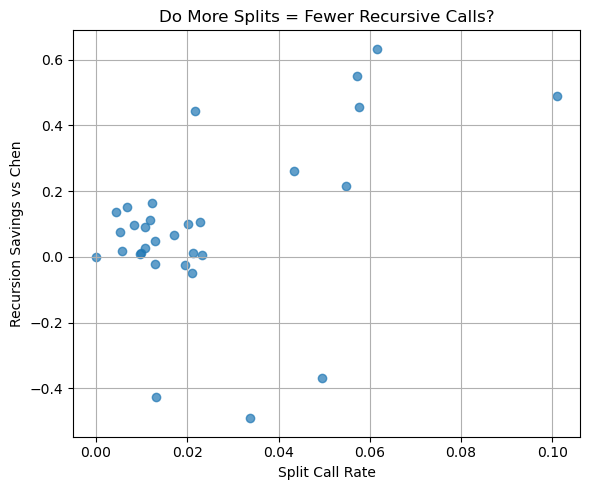

In [23]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    # --- Load your data ---
    file_path = "fifth.txt"
    df = pd.read_csv(
        file_path,
        sep=r"\s+",
        header=None,
        engine="python",
        comment="#",
        names=[
            "k",
            "sd_recursions",
            "split_calls",
            "split_committed",
            "decomp_calls",
            "decomp_committed",
            "chen_recursions"
        ]
    )

    # --- Calculate Metrics ---
    df["split_call_rate"] = df["split_calls"] / df["sd_recursions"].replace(0, np.nan)
    df["recursion_savings_vs_chen"] = 1 - (df["sd_recursions"] / df["chen_recursions"].replace(0, np.nan))

    # --- Summary ---
    corr = df[["split_call_rate", "recursion_savings_vs_chen"]].corr().iloc[0, 1]
    print(f"🔹 Pearson Correlation between Split Call Rate and Recursion Savings: {corr:.4f}")

    # --- Scatter Plot ---
    plt.figure(figsize=(6, 5))
    plt.scatter(df["split_call_rate"], df["recursion_savings_vs_chen"], alpha=0.7)
    plt.xlabel("Split Call Rate")
    plt.ylabel("Recursion Savings vs Chen")
    plt.title("Do More Splits = Fewer Recursive Calls?")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [24]:
# Group by k to see trends
by_k = df.groupby("k")[["split_call_rate", "split_commit_rate", "recursion_savings_vs_chen"]].mean().reset_index()

print(by_k)

# Plot
plt.figure(figsize=(7,5))
plt.plot(by_k["k"], by_k["split_call_rate"], marker="o", label="Split Call Rate")
plt.plot(by_k["k"], by_k["split_commit_rate"], marker="s", label="Split Commit Rate")
plt.xlabel("k")
plt.ylabel("Rate")
plt.title("Split Triggering by Difficulty (k)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(by_k["k"], by_k["recursion_savings_vs_chen"], marker="o", color="purple", label="Recursion Savings")
plt.xlabel("k")
plt.ylabel("Average Savings vs Chen")
plt.title("Impact of Split by Difficulty (k)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()


KeyError: "Columns not found: 'split_commit_rate'"